# Proyek Analisis Data: E-commerce Public Dataset

- Nama: Ringga Ersha Ikhwani
- Email: ringgaersha200701@gmail.com
- Id Dicoding: ringgaersha

# Menentukan Pertanyaan Bisnis

Sales Analysis: 
- Bagaimana tingkat penjualan dan pendapatan tahun 2016, 2017, 2018?

Product Analysis: 
- Apa saja 10 produk yang memiliki tingkat penjualan tinggi?
- Apa saja 10 produk yang memiliki tingkat penjualan rendah?

Customer and Seller Analysis: 
- Bagaimana pesebaran wilayah dari customer yang melakukan transaksi?
- Bagaimana pesebaran wilayah dari seller yang melakukan transaksi ?
- Bagaimana Analisis tingkat RFM dari customer yang ada ?
- Bagaimana segmentasi customer yang didapatkan dari hasil analisis RFM ?

Order Analysis:
- Berapa banyak pesanan yang sampai On Time kepada customer?
- Berapa banyak pesanan yang sampai delayed kepada customer?
- Apa jenis pembayaran yang paling banyak digunakan oleh customer?
- Kapan waktu yang paling banyak terjadi transaksi oleh customer?

# Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

Dataset ini mencakup informasi yang dikumpulkan dari transaksi e-commerce di Brazil dalam rentang waktu tertentu. Dataset tersebut terdiri dari beberapa file yang terkait satu sama lain dan memberikan wawasan yang komprehensif tentang industri e-commerce di Brazil.

Deskripsi file dataset yang digunakan dalam analisis ini adalah sebagai berikut,

- orders_dataset : 
  File ini berisi informasi tentang pesanan, seperti ID pesanan, status pesanan, waktu pembelian, dan waktu pengiriman pesanan.

- order_items_dataset :
  File ini berisi informasi terperinci tentang setiap item yang dibeli dalam pesanan

- order_payments_dataset :
  File ini berisi informasi terperinci tentang jenis pembayaran yang digunakan dari setiap item yang dibeli dalam pesanan

- order_reviews_dataset :
  File ini berisi informasi terperinci tentang review dari setiap item yang dibeli dalam pesanan

- products_dataset :
  File ini berisi informasi tentang produk, termasuk ID produk dan nama produk.

- product_category_name_translation :
  File ini berisi informasi tentang kategori produk, termasuk ID produk dan kategori produk.

- sellers_dataset :
  File ini berisi informasi tentang penjual, seperti ID penjual, nama penjual, dan lokasi penjual (kota dan negara bagian).

- customers_dataset :
  File ini berisi informasi tentang pelanggan, seperti ID pelanggan, nama pelanggan, dan lokasi pelanggan (kota dan negara bagian).

- geolocation_dataset :
  File ini menyediakan informasi geografis tentang kota dan negara bagian di Brazil. Ini membantu dalam analisis berdasarkan lokasi geografis.

# Data Wrangling

## *Gathering Data*

#### Customers Dataset

In [2]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers_df.shape

(99441, 5)

#### Geolocation Dataset

In [4]:
geo_df = pd.read_csv('data/geolocation_dataset.csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
geo_df.shape

(1000163, 5)

#### Orders Dataset

In [6]:
#orders dataset
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [7]:
orders_df.shape

(99441, 8)

In [8]:
#order items dataset
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [9]:
order_items_df.shape

(112650, 7)

In [10]:
#order payments dataset
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
order_payments_df.shape

(103886, 5)

In [12]:
#order payments dataset
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,3/1/2018 0:00,3/2/2018 10:26


#### Product Dataset 

In [13]:
#product dataset
product_df = pd.read_csv('data/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
product_df.shape

(32951, 9)

In [15]:
#order payments dataset
product_category_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [16]:
product_category_df.shape

(71, 2)

#### Sellers Dataset

In [17]:
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [18]:
sellers_df.shape

(3095, 4)

## *Assessing Data*

### Customers Dataset

#### customers_df

In [19]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


     - Tidak ada kesalahan pada tipe data 
     - Tidak ada missing value pada customers_df

In [20]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


    - Tidak ada duplikasi data
    - Tidak ada inaccurate value pada customers_df

### Geolocation Dataset

#### geo_df

In [21]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


    - Tidak ada kesalahan tipe data
    - Tidak ada missing value pada geo_df

In [22]:
print("Jumlah duplikasi: ", geo_df.duplicated().sum())
geo_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


    - Terdapat 261831 duplikasi data, tetapi ini adalah data lokasi maka wajar saja ada beberapa data yang sama karena mengindikasikan letak pelanggan yang ada pada daerah tertentu dan berada pada daerah yang sama.
    - Tidak ada inaccurate value pada geo_df

### Orders Dataset

#### orders_df 

In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


    Terdapat kesalahan tipe data pada kolom  order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date. Karena merupakan data date maka harus bertipe datetime. Lalu pada kolom order_purchase_timestamp.


In [24]:
#missing value
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

    Terdapat missing value pada order_approved_at sebanyak 160, order_delivered_carrier_date sebanyak 1783, order_delivered_customer_date sebanyak 2965

In [25]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,88789,50462,61544,75649,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,8/2/2018 12:06,1/10/2018 10:32,5/9/2018 15:48,2/1/2018 20:29,12/20/2017 0:00
freq,1,1,96478,28,109,47,7,522


    - Tidak ada duplikasi data
    - Tidak ada inaccurate value pada orders_df

#### order_items_df 

In [26]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


    - Tidak ada kesalahan tipe data
    - Tidak ada missing value pada order_items_df

In [27]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


    - Tidak ada duplikasi data
    - Tidak ada inaccurate value pada order_items_df

#### order_payments_df

In [28]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


    - Tidak ada kesalahan tipe data
    - Tidak ada missing value pada order_payments_df

In [29]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


    - Tidak ada duplikasi data
    - Tidak ada inaccurate value pada order_payments_df

#### order_reviews_df

In [30]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


    Terdapat kesalahan tipe data review_creation_date menjadi datetime. Dan mengubah review_answer_timestamp dalam bentuk jam

In [31]:
#missing value
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

    Terdapat missing value pada review_comment_title sebanyak 87656 dan review_comment_message sebanyak 58247

In [32]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


    - Tidak terdapat duplikasi data
    - Tidak terdapat inaccurate value pada order_reviews_df

#### product_df 

In [33]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


    Tidak terdapat kesalahan tipe data pada product_df

In [34]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

    Terdapat missing value pada product_category_name, product_name_lenght, product_description_lenght, product_photos_qty masing-masing sebanyak 610. Dan product_weight_g, product_length_cm, product_height_cm, product_width_cm masing-masing sebanyak 2.    

In [35]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


    - Tidak terdapat duplikasi data
    - Tidak terdapat inaccurate value pada product_df

#### product_category_df 

In [36]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


    - Tidak ada kesalahan tipe data
    - Tidak ada missing value pada product_category_df

In [37]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


    - Tidak ada duplikasi data
    - Tidak ada inaccurate value pada product_category_df

#### sellers_df

In [38]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


    - Tidak ada kesalahan tipe data
    - Tidak ada missing value pada sellers_df

In [39]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


    - Tidak ada duplikasi data
    - Tidak ada inaccurate value pada sellers_df

## *Cleaning Data* 

### Order Dataset

#### orders_df 

- Mengubah kesalahan pada tipe data menjadi DateTime

In [40]:
datetime_columns = ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date",   
"order_estimated_delivery_date"]
 
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])
    orders_df[column] = orders_df[column].dt.date
    orders_df[column] = pd.to_datetime(orders_df[column])
    
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


- Mengubah kolom order_purchase_timestamp menjadi tipe data datetime

In [41]:
datetime_columns = ["order_purchase_timestamp"]
 
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])
    orders_df[column] = orders_df[column].dt.strftime("%H")
    
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,20,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,19,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,21,2018-02-13,2018-02-14,2018-02-16,2018-02-26


   Mengubah order_purchase_timestamp menjadi format waktu dalam jam dan tipe data int bukan date time sehingga bisa di beri label

- Mengatasi missing value

In [42]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,15,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,13,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,12,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,16,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,16,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,15,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,15,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,11,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,16,NaT,NaT,NaT,2018-10-01


   Terlihat bahwa missing value yang dimiliki ketiga feature order_approved_at, order_delivered_carrier_date, order_delivered_customer_date selalu berpasangan

In [43]:
orders_df = orders_df.sort_values('order_approved_at')

   Melakukan sort values pada feature order_approved_at agar tersusun sesuai tanggal

In [44]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(method='ffill')

   Melakukan forward fill untuk mengisi nilai missing value pada feature order_approved_at. Forward fill (disingkat FF) adalah metode yang digunakan untuk mengganti nilai yang hilang dalam suatu kolom dengan nilai dari baris sebelumnya dalam urutan yang sama.

In [45]:
orders_df = orders_df.sort_values('order_delivered_carrier_date')

   Melakukan sort values pada feature order_delivered_carrier_date agar tersusun sesuai tanggal

In [46]:
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(method='ffill')

   Melakukan forward fill untuk mengisi nilai missing value pada feature order_delivered_carrier_date

In [47]:
orders_df = orders_df.sort_values('order_delivered_customer_date')

   Melakukan sort values pada feature order_delivered_customer_date agar tersusun sesuai tanggal

In [48]:
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(method='ffill')

Melakukan forward fill untuk mengisi nilai missing value pada feature order_delivered_carrier_date

In [49]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### order_reviews_df 

- Mengatasi missing value

In [50]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,7/7/2018 0:00,7/14/2018 17:18
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,12/9/2017 0:00,12/11/2017 20:06
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",3/22/2018 0:00,3/23/2018 9:10
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,7/1/2018 0:00,7/2/2018 12:59


In [51]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2/17/2018 0:00,2/18/2018 14:36
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,4/13/2018 0:00,4/16/2018 0:39
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,7/16/2017 0:00,7/18/2017 19:30
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,12/13/2017 0:00,12/14/2017 11:09
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,4/27/2018 0:00,4/30/2018 1:18
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,7/7/2018 0:00,7/14/2018 17:18
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,12/9/2017 0:00,12/11/2017 20:06


Drop Kolom review_comment_title dan review_comment_message karena terlalu banyak missing value

In [52]:
clean_order_reviews_df = order_reviews_df.drop(['review_comment_title', 'review_comment_message'], axis=1)

Mengubah review_creation_date menjadi datetime

In [53]:
datetime_columns = ["review_creation_date"]
 
for column in datetime_columns:
    clean_order_reviews_df[column] = pd.to_datetime(clean_order_reviews_df[column])
    clean_order_reviews_df[column] = clean_order_reviews_df[column].dt.date
    clean_order_reviews_df[column] = pd.to_datetime(clean_order_reviews_df[column])
    
clean_order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.8+ MB


Mengubah review_answer_timestamp dalam bentuk jam

In [54]:
datetime_columns = ["review_answer_timestamp"]
 
for column in datetime_columns:
    clean_order_reviews_df[column] = pd.to_datetime(clean_order_reviews_df[column])
    clean_order_reviews_df[column] = clean_order_reviews_df[column].dt.strftime("%H")
    
clean_order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,21
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,03
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,14
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,22
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,10


Labeling Order Delivery Status

In [55]:
# order_df =  orders_df.customer_id
orders_df["delivery_status"] = np.where(orders_df["order_estimated_delivery_date"] < orders_df["order_delivered_customer_date"], "Delayed", "On Time")

In [56]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status
59102,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time
1384,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,14,2016-10-04,2016-10-08,2016-10-11,2016-11-30,On Time
70210,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time
52382,92b44b87f1f7670b8911c5f0e642435e,e561a3f61440b031d3be286a696d06eb,delivered,11,2016-10-06,2016-10-10,2016-10-13,2016-11-25,On Time
32348,a041155864e5141116458291313b35c2,8fbab2ff4df1a7cc9531b14a686bb3ce,delivered,15,2016-10-06,2016-10-10,2016-10-13,2016-11-24,On Time


Combine Data Order

In [57]:
orders_df_1 = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders_df_2 = pd.merge(
    left=orders_df_1,
    right=order_payments_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders_df = pd.merge(
    left=orders_df_2,
    right=clean_order_reviews_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,order_item_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,1,...,23.9,26.82,1,credit_card,10,101.44,7d58a5b4bc501c1ece8972fa04351be2,5,2016-10-20,01
1,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,2,...,23.9,26.82,1,credit_card,10,101.44,7d58a5b4bc501c1ece8972fa04351be2,5,2016-10-20,01
2,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,14,2016-10-04,2016-10-08,2016-10-11,2016-11-30,On Time,1,...,93.9,17.61,1,credit_card,4,111.51,a0ba97ce98f76cf57bb2c5530513be70,3,2016-10-25,23
3,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,139.9,21.34,2,voucher,1,74.65,faf9ce3802b882a10bcd548f421ea9ff,5,2016-10-18,19
4,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,139.9,21.34,1,credit_card,3,86.59,faf9ce3802b882a10bcd548f421ea9ff,5,2016-10-18,19


In [58]:
#cek missing value
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_status                  0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
dtype: int64

In [59]:
orders_df.shape

(117329, 23)

### Product Dataset

#### product_df 

In [60]:
#cek missing value
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [61]:
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


missing value product_category_name selalu bergandengan dengan product_name_lenght, product_description_lenght, product_photos_qty.
drop missing value karena sedikit dan tidak mempengaruhi visualisasi data

In [62]:
clean_product_df = product_df.dropna()

In [63]:
clean_product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Combine Data Product

In [64]:
product_df = pd.merge(
    left=clean_product_df,
    right=product_category_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [65]:
#cek missing value
product_df.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [66]:
product_df.shape

(32327, 10)

## *Exploratory Data Analysis* 

### Customer 

In [67]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [68]:
#persebaran jumlah customer berdasarkan kota (city) dan negara bagian (state). 
customers_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "customer_city" : "unique"
}).sort_values(by="customer_id",ascending=False).reset_index()

,customer_state,customer_id,customer_city
0,SP,41746,"[franca, sao bernardo do campo, sao paulo, mog..."
1,RJ,12852,"[rio de janeiro, resende, parati, sao goncalo,..."
2,MG,11635,"[timoteo, belo horizonte, montes claros, santa..."
3,RS,5466,"[caxias do sul, novo hamburgo, pelotas, porto ..."
4,PR,5045,"[curitiba, sao jose dos pinhais, cascavel, ara..."
5,SC,3637,"[jaragua do sul, florianopolis, sao jose, timb..."
6,BA,3380,"[camacari, cruz das almas, feira de santana, s..."
7,DF,2140,"[brasilia, taguatinga, sobradinho, guara, ceil..."
8,ES,2033,"[cachoeiro de itapemirim, ibatiba, vila velha,..."
9,GO,2020,"[aparecida de goiania, goiania, trindade, bom ..."


State dengan jumlah customer terbanyak adalah SP

In [69]:
#persebaran jumlah customer berdasarkan kota (city) 
customers_df.groupby(by="customer_city").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id",ascending=False).reset_index().nlargest(10, "customer_id")

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


City dengan jumlah customer terbanyak adalah sao paulo

In [70]:
#persebaran jumlah customer berdasarkan kota (city) 
customers_df.groupby(by="customer_city").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id",ascending=False).reset_index().nsmallest(10, "customer_id")

,customer_city,customer_id
2975,acucena,1
2976,sao nicolau,1
2977,alexandrita,1
2978,sao miguel do cambui,1
2979,trabiju,1
2980,caxingo,1
2981,vieiras,1
2982,caxambu do sul,1
2983,alfredo marcondes,1
2984,cotipora,1


City dengan jumlah customer paling sedikit adalah acucena hingga cotipora

### Geolocation 

In [71]:
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [72]:
#geolocation city
geo_df.geolocation_city.unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [73]:
#jumlah geolocation city
geo_df.geolocation_city.nunique()

8011

In [74]:
#geolocation state
geo_df.geolocation_state.unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

In [75]:
# jumlah geolocation state
geo_df.geolocation_state.nunique()

27

### Orders 

In [76]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,order_item_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,1,...,23.9,26.82,1,credit_card,10,101.44,7d58a5b4bc501c1ece8972fa04351be2,5,2016-10-20,01
1,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,2,...,23.9,26.82,1,credit_card,10,101.44,7d58a5b4bc501c1ece8972fa04351be2,5,2016-10-20,01
2,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,14,2016-10-04,2016-10-08,2016-10-11,2016-11-30,On Time,1,...,93.9,17.61,1,credit_card,4,111.51,a0ba97ce98f76cf57bb2c5530513be70,3,2016-10-25,23
3,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,139.9,21.34,2,voucher,1,74.65,faf9ce3802b882a10bcd548f421ea9ff,5,2016-10-18,19
4,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,139.9,21.34,1,credit_card,3,86.59,faf9ce3802b882a10bcd548f421ea9ff,5,2016-10-18,19


In [77]:
#melihat jumlah order status
orders_df.groupby(by="order_status").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id", ascending=False).reset_index()

,order_status,customer_id
0,delivered,95831
1,shipped,1031
2,canceled,444
3,invoiced,307
4,processing,295
5,unavailable,6
6,approved,2


In [78]:
#melihat review berdasarkan delivery status delayed
orders_df[orders_df['order_estimated_delivery_date'] < orders_df['order_delivered_customer_date']]['review_score'].value_counts()

1    5741
5    1430
3     970
4     873
2     822
Name: review_score, dtype: int64

pengiriman delayed(terlambat) mendapat banyak bintang 1 dari customer

In [79]:
#melihat review berdasarkan delivery status on time
orders_df[orders_df['order_estimated_delivery_date'] > orders_df['order_delivered_customer_date']]['review_score'].value_counts()

5    64089
4    21068
1     8965
3     8670
2     3206
Name: review_score, dtype: int64

pengiriman on time(tepat waktu) mendapat banyak bintang 5 dari customer

In [80]:
#melihat jumlah payment type
orders_df.groupby("payment_type").agg({
    "customer_id": "nunique",
    "payment_value": "mean"
}).sort_values(by="customer_id",ascending=False).reset_index()

,payment_type,customer_id,payment_value
0,credit_card,75408,179.011599
1,boleto,19471,177.022206
2,voucher,3731,64.248868
3,debit_card,1514,150.077825


Payment type yang banyak digunakan adalah credit_card karena memiliki jumlah value paling besar

In [81]:
#membuat feature order_year dan order_month berdasarkan order_approved_at
orders_df['order_year'] = orders_df['order_approved_at'].dt.year
orders_df['order_month'] = orders_df['order_approved_at'].dt.month

In [82]:
def get_month_name(month):
    return (
        "january" if month == 1
        else
        "february" if month == 2
        else
        "march" if month == 3
        else
        "april" if month == 4
        else
        "may" if month == 5
        else
        "june" if month == 6
        else
        "july" if month == 7
        else
        "august" if month == 8
        else
        "september" if month == 9
        else
        "october" if month == 10
        else
        "november" if month == 11
        else
        "desember"
    )

In [83]:
orders_df['order_month_name'] = orders_df['order_month'].astype('int').map(get_month_name)

In [84]:
#memberi label bulan untuk tiap order
orders_df[['order_year','order_month_name']].head()

,order_year,order_month_name
0,2016,october
1,2016,october
2,2016,october
3,2016,october
4,2016,october


In [85]:
#melihat bulan order
orders_df.order_month_name.unique()

array(['october', 'desember', 'january', 'september', 'february', 'march',
       'april', 'may', 'june', 'july', 'august', 'november'], dtype=object)

data e-commerce memiliki data lengkap dari bulan januari-desember

In [86]:
#melihat tahun order
orders_df.order_year.unique()

array([2016, 2017, 2018], dtype=int64)

Transaksi dari tahun 2016-2018

In [87]:
#melihat jumlah transaksi tiap bulan
orders_df.groupby(by="order_month_name").agg({
    "customer_id" : "nunique"
}).sort_values(by="customer_id",ascending=False).reset_index()

,order_month_name,customer_id
0,august,10866
1,may,10636
2,july,10006
3,march,9835
4,june,9335
5,april,9068
6,february,8326
7,january,7817
8,november,7248
9,desember,5733


Bulan dengan transaksi terbanyak adalah August

In [88]:
#memberi label waktu transaksi pelanggan
def get_part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

In [89]:
orders_df['order_purchase_time'] = orders_df['order_purchase_timestamp'].astype('int').map(get_part_of_day)
orders_df['review_answer_time'] = orders_df["review_answer_timestamp"].astype('int').map(get_part_of_day)

In [90]:
orders_df[['order_purchase_time','review_answer_time']].head()

,order_purchase_time,review_answer_time
0,afternoon,night
1,afternoon,night
2,afternoon,night
3,afternoon,evening
4,afternoon,evening


In [91]:
#melihat jumlah waktu transaksi
orders_df.groupby(by="order_purchase_time").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id",ascending=False).reset_index()

,order_purchase_time,customer_id
0,afternoon,37780
1,evening,29532
2,morning,22083
3,night,8521


Transaksi paling banyak dilakukan adalah afternoon (siang hari)

In [92]:
#melihat jumlah waktu review transaksi
orders_df.groupby(by="review_answer_time").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id",ascending=False).reset_index()

,review_answer_time,customer_id
0,afternoon,29100
1,night,26227
2,evening,26007
3,morning,16839


Review yang dilakukan customer paling banyak adalah afternoon (siang hari)

### Product 

In [93]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [94]:
#mengubah nama kolom catgory product
product_df.rename(columns = {'product_category_name_english':'product_name'}, inplace = True)
product_df.drop('product_category_name', axis=1, inplace=True)
product_df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [95]:
product_df.product_name.unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app

In [96]:
#melihat jumlah produk yang banyak dibeli
product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "product_weight_g": "mean",
    "product_photos_qty": "mean"
}).sort_values(by="product_id",ascending=False).reset_index().nlargest(10, "product_id")

,product_name,product_id,product_weight_g,product_photos_qty
0,bed_bath_table,3029,2456.405084,1.392539
1,sports_leisure,2867,2024.670736,2.135333
2,furniture_decor,2657,3008.266842,2.400828
3,health_beauty,2444,1434.793781,1.624386
4,housewares,2335,3020.793576,2.212848
5,auto,1900,2654.650526,2.636842
6,computers_accessories,1639,898.377669,1.987797
7,toys,1411,1869.356485,2.458540
8,watches_gifts,1329,509.287434,2.234011
9,telephony,1134,236.506173,2.759259


Produk yang paling banyak dibeli adalah bed_bath_table

In [97]:
#melihat jumlah produk yang sedikit dibeli
product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "product_weight_g": "mean",
    "product_photos_qty": "mean"
}).sort_values(by="product_id",ascending=False).reset_index().nsmallest(10, "product_id")

,product_name,product_id,product_weight_g,product_photos_qty
70,cds_dvds_musicals,1,550.000000,2.000000
69,security_and_services,2,812.500000,2.500000
67,home_comfort_2,5,1467.600000,1.200000
68,fashion_childrens_clothes,5,324.000000,3.200000
66,tablets_printing_image,9,381.444444,3.000000
64,la_cuisine,10,4350.000000,1.100000
65,furniture_mattress_and_upholstery,10,13190.000000,2.000000
63,diapers_and_hygiene,12,1037.500000,2.166667
62,flowers,14,1403.571429,1.214286
60,arts_and_craftmanship,19,1164.578947,3.000000


Produk yang sedikit dibeli adalah cds_dvds_musicals

### Sellers 

In [98]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [99]:
#persebaran wilayah sellers 
sellers_df.groupby(by="seller_state").agg({
    "seller_id" : "nunique",
    "seller_city" : "unique"
}).sort_values(by="seller_id",ascending=False).reset_index()

,seller_state,seller_id,seller_city
0,SP,1849,"[campinas, mogi guacu, sao paulo, braganca pau..."
1,PR,349,"[curitiba, arapongas, sao jose dos pinhais, po..."
2,MG,244,"[belo horizonte, camanducaia, congonhal, aragu..."
3,SC,190,"[tubarao, imbituba, garopaba, sao ludgero, sao..."
4,RJ,171,"[rio de janeiro, saquarema, petropolis, itabor..."
5,RS,129,"[tres de maio, porto alegre, santo antonio da ..."
6,GO,40,"[anapolis, santa terezinha de goias, uruacu, g..."
7,DF,30,"[brasilia, brasilia df, gama]"
8,ES,23,"[viana, cachoeiro de itapemirim, cariacica / e..."
9,BA,19,"[lauro de freitas, porto seguro, salvador, bar..."


Seller terbanyak berada pada state SP

In [100]:
#jumlah seller city
sellers_df.groupby(by="seller_city").agg({
    "seller_id": "nunique"
}).sort_values(by="seller_id",ascending=False).reset_index().nlargest(10, "seller_id")

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


Seller terbanyak terdapat dikota sao paulo

### Customer and Order

### Customer 

In [101]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [102]:
customers_df.shape

(99441, 5)

In [103]:
customers_df["customer_id"].nunique()

99441

### Order 

In [104]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,order_item_id,...,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,order_year,order_month,order_month_name,order_purchase_time,review_answer_time
0,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,1,...,101.44,7d58a5b4bc501c1ece8972fa04351be2,5,2016-10-20,01,2016,10,october,afternoon,night
1,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,2,...,101.44,7d58a5b4bc501c1ece8972fa04351be2,5,2016-10-20,01,2016,10,october,afternoon,night
2,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,14,2016-10-04,2016-10-08,2016-10-11,2016-11-30,On Time,1,...,111.51,a0ba97ce98f76cf57bb2c5530513be70,3,2016-10-25,23,2016,10,october,afternoon,night
3,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,74.65,faf9ce3802b882a10bcd548f421ea9ff,5,2016-10-18,19,2016,10,october,afternoon,evening
4,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,86.59,faf9ce3802b882a10bcd548f421ea9ff,5,2016-10-18,19,2016,10,october,afternoon,evening


In [105]:
orders_df.shape

(117329, 28)

In [106]:
orders_df["customer_id"].nunique()

97916

### Customer aktif dan non aktif 

In [107]:
orders_df_only =  orders_df.customer_id
customers_df["status_customer"] = np.where(customers_df["customer_id"].isin(orders_df['customer_id']), 'aktif', 'nonaktif')
customers_df.groupby(by="status_customer").customer_id.count()

status_customer
aktif       97916
nonaktif     1525
Name: customer_id, dtype: int64

Sebagian besar customer adalah customer aktif sebanyak 97916

### Product and Order

### Product

In [108]:
product_df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [109]:
product_df.describe(include="all")

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name
count,32327,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000,32327
unique,32327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,48.473722,771.517277,2.188790,2276.960807,30.856498,16.955950,23.208464,NaN
std,NaN,10.246346,635.189674,1.736767,4279.734063,16.958460,13.637246,12.080665,NaN
min,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,20.500000,30.000000,NaN


In [110]:
product_df.isna().sum()

product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
product_name                  0
dtype: int64

### Order 

In [111]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,order_item_id,...,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,order_year,order_month,order_month_name,order_purchase_time,review_answer_time
0,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,1,...,101.44,7d58a5b4bc501c1ece8972fa04351be2,5,2016-10-20,01,2016,10,october,afternoon,night
1,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,2,...,101.44,7d58a5b4bc501c1ece8972fa04351be2,5,2016-10-20,01,2016,10,october,afternoon,night
2,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,14,2016-10-04,2016-10-08,2016-10-11,2016-11-30,On Time,1,...,111.51,a0ba97ce98f76cf57bb2c5530513be70,3,2016-10-25,23,2016,10,october,afternoon,night
3,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,74.65,faf9ce3802b882a10bcd548f421ea9ff,5,2016-10-18,19,2016,10,october,afternoon,evening
4,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,86.59,faf9ce3802b882a10bcd548f421ea9ff,5,2016-10-18,19,2016,10,october,afternoon,evening


In [112]:
orders_df.describe(include="all")

C:\Users\Asus\AppData\Local\Temp\ipykernel_12332\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
C:\Users\Asus\AppData\Local\Temp\ipykernel_12332\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
C:\Users\Asus\AppData\Local\Temp\ipykernel_12332\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future beh

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,order_item_id,...,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,order_year,order_month,order_month_name,order_purchase_time,review_answer_time
count,117329,117329,117329,117329,117329,117329,117329,117329,117329,117329.000000,...,117329.000000,117329,117329.000000,117329,117329,117329.000000,117329.000000,117329,117329,117329
unique,97916,97916,7,24,609,547,643,449,2,NaN,...,NaN,97708,NaN,632,24,NaN,NaN,12,4,4
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,16,2018-04-24 00:00:00,2018-09-11 00:00:00,2018-10-17 00:00:00,2017-12-20 00:00:00,On Time,NaN,...,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,2017-12-19 00:00:00,11,NaN,NaN,may,afternoon,afternoon
freq,63,63,114859,7954,1153,1236,2472,652,107493,NaN,...,NaN,63,NaN,542,8229,NaN,NaN,12821,45528,35122
first,NaN,NaN,NaN,NaN,2016-10-04 00:00:00,2016-10-08 00:00:00,2016-10-11 00:00:00,2016-10-20 00:00:00,NaN,NaN,...,NaN,NaN,NaN,2016-10-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2018-09-03 00:00:00,2018-09-11 00:00:00,2018-10-17 00:00:00,2018-10-25 00:00:00,NaN,NaN,...,NaN,NaN,NaN,2018-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.194121,...,172.062565,NaN,4.031467,NaN,NaN,2017.538222,6.039121,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.684225,...,265.388194,NaN,1.387927,NaN,NaN,0.505044,3.228985,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,0.000000,NaN,1.000000,NaN,NaN,2016.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,60.750000,NaN,4.000000,NaN,NaN,2017.000000,3.000000,NaN,NaN,NaN


In [113]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_status                  0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
order_year                       0
order_month                      0
order_month_name                 0
order_purchase_time              0
review_answer_time               0
dtype: int64

### Produk yang tidak pernah dibeli 

In [114]:
product_df_only =  orders_df.product_id
product_df["status_products"] = np.where(product_df["product_id"].isin(orders_df['product_id']), 'Ordered', 'No order')
product_df.groupby(by="status_products").product_id.count()

status_products
No order      157
Ordered     32170
Name: product_id, dtype: int64

Terdapat 157 product yang tidak pernah dibeli

### Merge Data Produk dan Order 

In [115]:
orders_products_df = pd.merge(
    left=orders_df,
    right=product_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
orders_products_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,order_item_id,...,review_answer_time,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name,status_products
0,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,1,...,night,33.0,259.0,2.0,1500.0,65.0,15.0,15.0,furniture_decor,Ordered
1,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,2,...,night,33.0,259.0,2.0,1500.0,65.0,15.0,15.0,furniture_decor,Ordered
2,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,14,2016-10-04,2016-10-08,2016-10-11,2016-11-30,On Time,1,...,night,49.0,100.0,1.0,1200.0,25.0,25.0,20.0,furniture_decor,Ordered
3,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,evening,63.0,637.0,2.0,2500.0,39.0,9.0,29.0,furniture_decor,Ordered
4,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,evening,63.0,637.0,2.0,2500.0,39.0,9.0,29.0,furniture_decor,Ordered


In [116]:
orders_products_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_status                  0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
order_year                       0
order_month                      0
order_month_name                 0
order_purchase_time              0
review_answer_time               0
product_name_lenght 

In [117]:
orders_products_df.groupby(by="product_name").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "payment_value": "sum",
    "review_score": "mean"
}).nlargest(10, "payment_value")

,order_id,order_item_id,payment_value,review_score
product_name,,,,
bed_bath_table,9313,14608,1725465.67,3.890605
health_beauty,8770,11368,1646292.53,4.137973
computers_accessories,6649,10222,1592611.66,3.936089
furniture_decor,6398,12038,1427214.01,3.912158
watches_gifts,5576,6765,1420682.17,4.017692
sports_leisure,7669,10273,1390581.87,4.107470
housewares,5843,9503,1091709.15,4.060428
garden_tools,3496,6104,834757.45,4.023914
auto,3877,4826,802254.74,4.064279


walaupun bed_bath_table menjadi produk paling laku, produk ini mendapatkan rating yang tidak terlalu tinggi yaitu rata-rata 3.8 lebih rendah daripada produk lainnya yang berada di 10 produk paling laku

### Order, Product, Seller 

### Order dan Product

In [118]:
orders_products_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,order_item_id,...,review_answer_time,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name,status_products
0,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,1,...,night,33.0,259.0,2.0,1500.0,65.0,15.0,15.0,furniture_decor,Ordered
1,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,2,...,night,33.0,259.0,2.0,1500.0,65.0,15.0,15.0,furniture_decor,Ordered
2,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,14,2016-10-04,2016-10-08,2016-10-11,2016-11-30,On Time,1,...,night,49.0,100.0,1.0,1200.0,25.0,25.0,20.0,furniture_decor,Ordered
3,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,evening,63.0,637.0,2.0,2500.0,39.0,9.0,29.0,furniture_decor,Ordered
4,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,evening,63.0,637.0,2.0,2500.0,39.0,9.0,29.0,furniture_decor,Ordered


In [119]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Merge Data Order-Product dan Sellers

In [120]:
sellers_orders_products_df = pd.merge(
    left=orders_products_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
sellers_orders_products_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,order_item_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name,status_products,seller_zip_code_prefix,seller_city,seller_state
0,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,1,...,2.0,1500.0,65.0,15.0,15.0,furniture_decor,Ordered,17051,bauru,SP
1,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,2,...,2.0,1500.0,65.0,15.0,15.0,furniture_decor,Ordered,17051,bauru,SP
2,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,14,2016-10-04,2016-10-08,2016-10-11,2016-11-30,On Time,1,...,1.0,1200.0,25.0,25.0,20.0,furniture_decor,Ordered,87900,loanda,PR
3,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,2.0,2500.0,39.0,9.0,29.0,furniture_decor,Ordered,37410,tres coracoes,MG
4,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,2.0,2500.0,39.0,9.0,29.0,furniture_decor,Ordered,37410,tres coracoes,MG


In [121]:
sellers_orders_products_df.groupby(by="seller_city").agg({
    "order_id": "nunique",
    "payment_value": "sum",
    "product_name": pd.Series.mode
}).nlargest(10, "payment_value")

,order_id,payment_value,product_name
seller_city,,,
sao paulo,24215,4154006.77,furniture_decor
ibitinga,6473,1060183.69,bed_bath_table
curitiba,2678,646929.93,furniture_decor
itaquaquecetuba,1232,574161.05,office_furniture
rio de janeiro,2117,478609.31,toys
guarulhos,1694,447877.58,auto
sao jose do rio preto,1957,413318.07,garden_tools
ribeirao preto,1985,386479.18,sports_leisure
maringa,1848,386153.96,computers_accessories


Kota yang paling banyak transaksinya adalah sao paulo dengan produk yang terjual paling banyak adalah furniture_decor

### Join All Data 

In [122]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,aktif
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,aktif
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,aktif
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,aktif
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,aktif


In [123]:
sellers_orders_products_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,order_item_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name,status_products,seller_zip_code_prefix,seller_city,seller_state
0,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,1,...,2.0,1500.0,65.0,15.0,15.0,furniture_decor,Ordered,17051,bauru,SP
1,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,2,...,2.0,1500.0,65.0,15.0,15.0,furniture_decor,Ordered,17051,bauru,SP
2,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,14,2016-10-04,2016-10-08,2016-10-11,2016-11-30,On Time,1,...,1.0,1200.0,25.0,25.0,20.0,furniture_decor,Ordered,87900,loanda,PR
3,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,2.0,2500.0,39.0,9.0,29.0,furniture_decor,Ordered,37410,tres coracoes,MG
4,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,2.0,2500.0,39.0,9.0,29.0,furniture_decor,Ordered,37410,tres coracoes,MG


In [124]:
all_df = pd.merge(
    left=sellers_orders_products_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,order_item_id,...,product_name,status_products,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status_customer
0,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,1,...,furniture_decor,Ordered,17051,bauru,SP,f176923a0a4ab546c7287791ccb82193,78075,cuiaba,MT,aktif
1,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,13,2016-10-04,2016-10-08,2016-10-11,2016-12-06,On Time,2,...,furniture_decor,Ordered,17051,bauru,SP,f176923a0a4ab546c7287791ccb82193,78075,cuiaba,MT,aktif
2,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,14,2016-10-04,2016-10-08,2016-10-11,2016-11-30,On Time,1,...,furniture_decor,Ordered,87900,loanda,PR,1dc848c11c2985635c268ff3dea707eb,21853,rio de janeiro,RJ,aktif
3,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,furniture_decor,Ordered,37410,tres coracoes,MG,af46f006f8c0e0d06975480af3805422,6449,barueri,SP,aktif
4,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,17,2016-10-06,2016-10-10,2016-10-13,2016-11-28,On Time,1,...,furniture_decor,Ordered,37410,tres coracoes,MG,af46f006f8c0e0d06975480af3805422,6449,barueri,SP,aktif


In [125]:
all_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_status                  0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
order_year                       0
order_month                      0
order_month_name                 0
order_purchase_time              0
review_answer_time               0
product_name_lenght 

In [126]:
all_df.groupby(by=["customer_city", "product_name"]).agg({
    "payment_value": "sum",
    "review_score": "mean"
}).nlargest(30, "payment_value")

payment_value  review_score
customer_city  product_name                                      
sao paulo      bed_bath_table             295685.33      3.994475
               computers_accessories      288500.24      4.017516
               health_beauty              263482.10      4.156250
               watches_gifts              194797.90      4.130081
               sports_leisure             192716.46      4.212722
               furniture_decor            192627.46      3.985999
               housewares                 165754.91      4.153901
rio de janeiro bed_bath_table             127026.50      3.652701
               fixed_telephony            112491.22      2.458333
               sports_leisure             107840.56      3.788779
               health_beauty              107022.94      4.071307
               watches_gifts              106593.31      3.804671
               computers_accessories      102793.75      3.921847
               furniture_decor            102006.88      3.715596
sao paulo      office_furniture            96734.20      3.493976
               toys                        87451.91      4.150888
rio de janeiro office_furniture            84180.70      3.395918
sao paulo      perfumery                   79364.13      4.211091
rio de janeiro housewares                  78049.31      3.899010
sao paulo      cool_stuff                  76481.90      4.258696
               auto                        74914.69      4.216312
               garden_tools                71764.63      4.158111
               baby                        65068.91      4.050682
rio de janeiro garden_tools                56140.98      3.604167
               toys                        54689.86      4.175793
sao paulo      telephony                   53908.41      4.069552
belo horizonte bed_bath_table              51078.09      3.810959
rio de janeiro cool_stuff                  50874.14      3.917293
belo horizonte health_beauty               44887.74      4.251799
brasilia       computers_accessories       43975.52      3.529412

In [127]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115608 entries, 0 to 115607
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115608 non-null  object        
 1   customer_id                    115608 non-null  object        
 2   order_status                   115608 non-null  object        
 3   order_purchase_timestamp       115608 non-null  object        
 4   order_approved_at              115608 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115608 non-null  datetime64[ns]
 6   order_delivered_customer_date  115608 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115608 non-null  datetime64[ns]
 8   delivery_status                115608 non-null  object        
 9   order_item_id                  115608 non-null  int64         
 10  product_id                     115608 non-null  object        
 11  

## *Visualisasi Data*

### Bagaimana tingkat penjualan tahun 2016, 2017, dan 2018? 

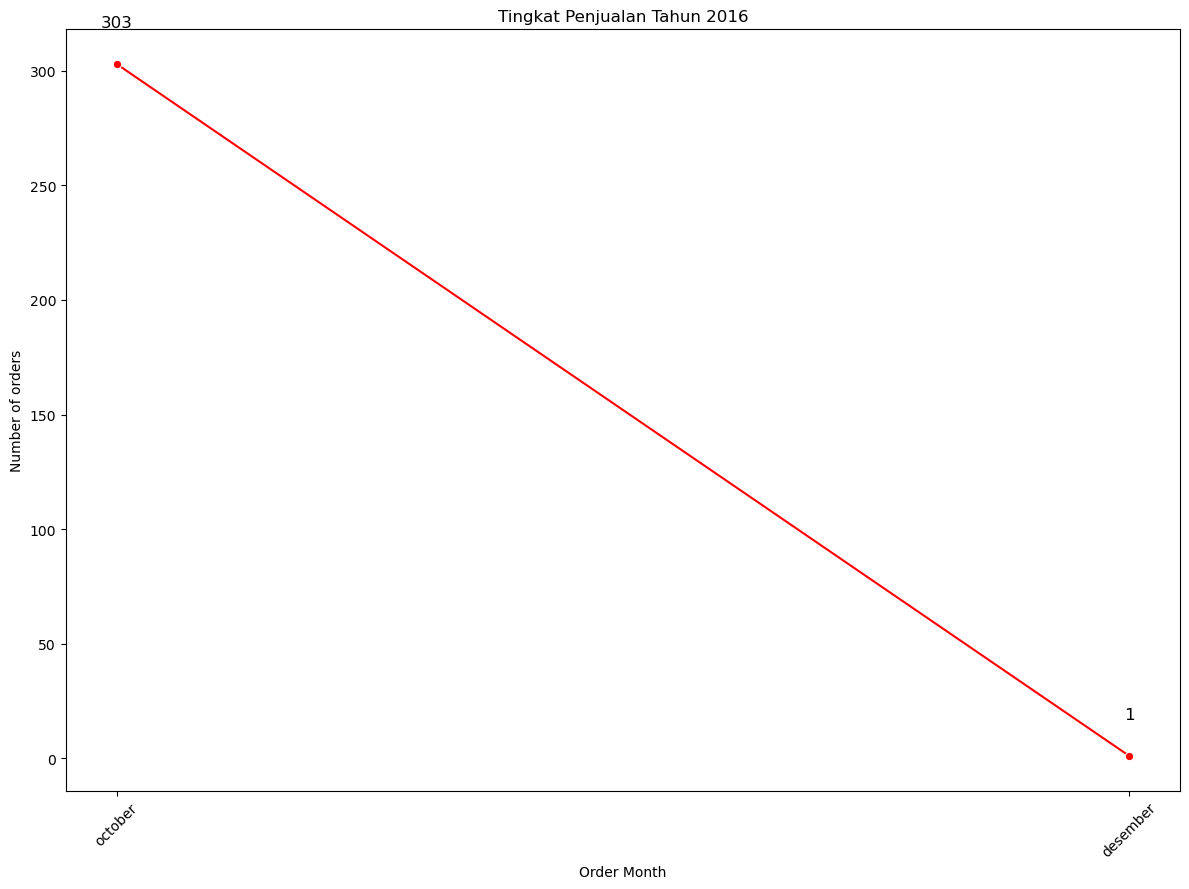

In [128]:
# Filter data untuk tahun 2016
df_tingkat_penjualan_2016 = all_df[all_df.order_year == 2016]

# Mengelompokkan data
tingkat_penjualan_2016 = df_tingkat_penjualan_2016.groupby(by='order_month').agg({
    "order_id": "nunique",
    "order_month_name" : pd.Series.mode,
    "payment_value" : "sum"
}).sort_values(by="order_month").reset_index()

# Membuat plot dengan Seaborn
plt.figure(figsize=(12, 9))
sns.lineplot(x='order_month_name', y='order_id', data=tingkat_penjualan_2016, marker='o', color='red')
plt.title("Tingkat Penjualan Tahun 2016")
plt.xlabel("Order Month")
plt.ylabel("Number of orders")

# Menambahkan label angka di atas titik
for x, y in zip(tingkat_penjualan_2016["order_month_name"], tingkat_penjualan_2016["order_id"]):
    plt.annotate(text=str(y), xy=(x, y), xytext=(x, y+15), fontsize=12, ha='center', va='bottom')

plt.xticks(rotation=45)  # Untuk memutar label bulan jika diperlukan
plt.tight_layout()
plt.show()

Tingkat penjualan di tahun 2016 tidak dapat diamati dengan baik dikarenakan ketidaklengkapan data yang ada. Yaitu hanya terdapat 1 transaksi pada bulan Desember 2016.

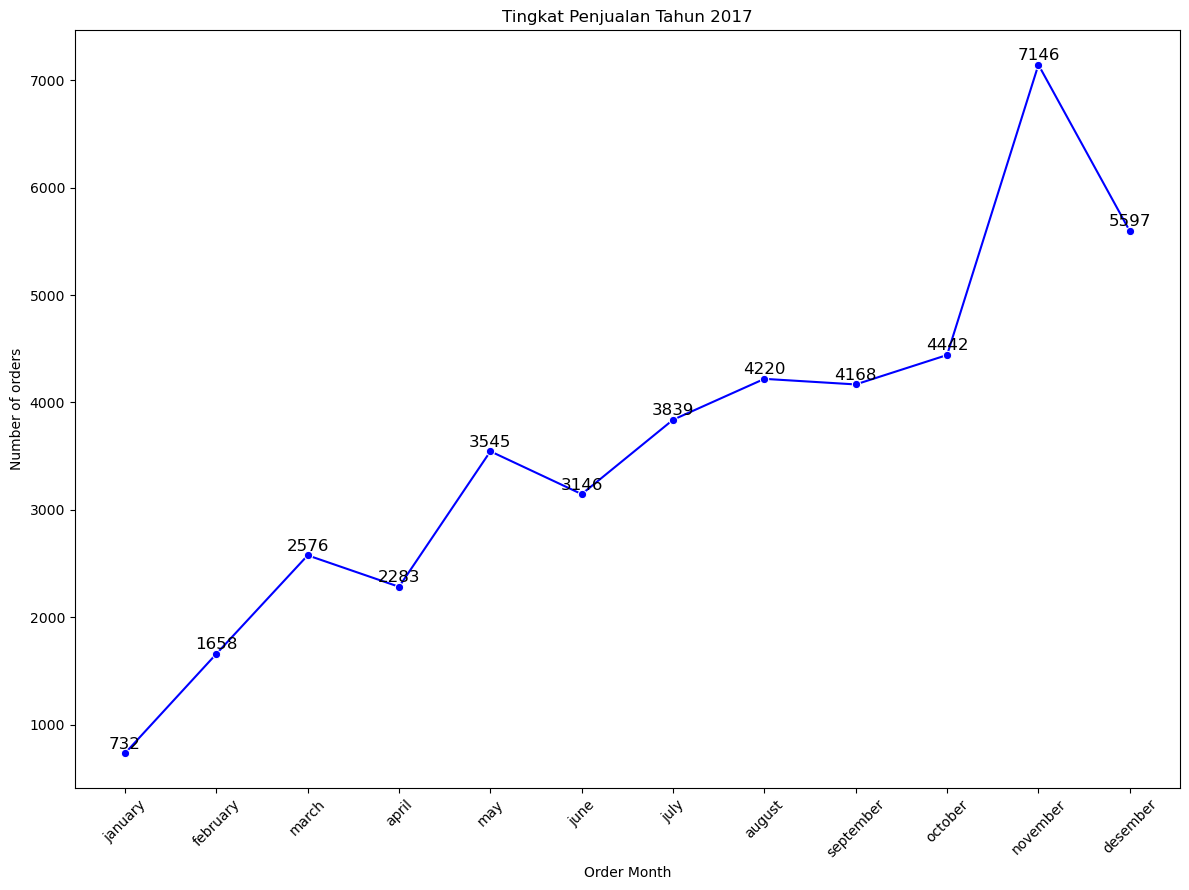

In [129]:
# Filter data untuk tahun 2017
df_tingkat_penjualan_2017 = all_df[all_df.order_year == 2017]

# Mengelompokkan data
tingkat_penjualan_2017 = df_tingkat_penjualan_2017.groupby(by='order_month').agg({
    "order_id": "nunique",
    "order_month_name" : pd.Series.mode,
    "payment_value" : "sum"
}).sort_values(by="order_month").reset_index()

# Membuat plot dengan Seaborn
plt.figure(figsize=(12, 9))
sns.lineplot(x='order_month_name', y='order_id', data=tingkat_penjualan_2017, marker='o', color='blue')
plt.title("Tingkat Penjualan Tahun 2017")
plt.xlabel("Order Month")
plt.ylabel("Number of orders")

# Menambahkan label angka di atas titik
for x, y in zip(tingkat_penjualan_2017["order_month_name"], tingkat_penjualan_2017["order_id"]):
    plt.annotate(text=str(y), xy=(x, y), xytext=(x, y+15), fontsize=12, ha='center', va='bottom')

plt.xticks(rotation=45)  # Untuk memutar label bulan jika diperlukan
plt.tight_layout()
plt.show()


Tingkat penjualan pada tahun 2017 menunjukan tren pertumbuhan yang baik hingga akhir tahun. Bulan november merupakan bulan yang memiliki jumlah transaksi tertinggi yaitu sebesar 7146 transaksi dengan total penjualan selama 1 tahun sebesar 43352 dan total pemasukan dari keseluruhan transaksi sebesar 8 juta USD atau sekitar 121 milyar rupiah.

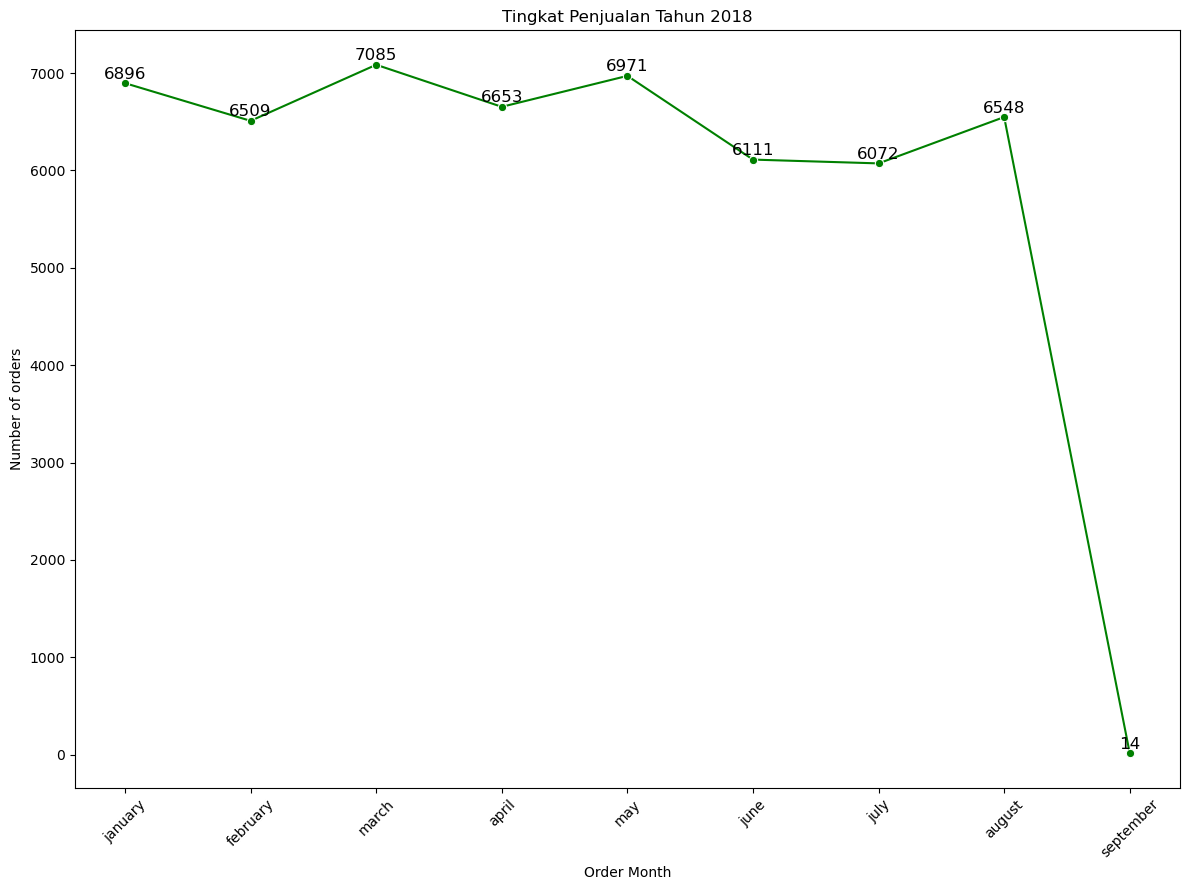

In [130]:
# Filter data untuk tahun 2018
df_tingkat_penjualan_2018 = all_df[all_df.order_year == 2018]

# Mengelompokkan data
tingkat_penjualan_2018 = df_tingkat_penjualan_2018.groupby(by='order_month').agg({
    "order_id": "nunique",
    "order_month_name" : pd.Series.mode,
    "payment_value" : "sum"
}).sort_values(by="order_month").reset_index()

# Membuat plot dengan Seaborn
plt.figure(figsize=(12, 9))
sns.lineplot(x='order_month_name', y='order_id', data=tingkat_penjualan_2018, marker='o', color='green')
plt.title("Tingkat Penjualan Tahun 2018")
plt.xlabel("Order Month")
plt.ylabel("Number of orders")

# Menambahkan label angka di atas titik
for x, y in zip(tingkat_penjualan_2018["order_month_name"], tingkat_penjualan_2018["order_id"]):
    plt.annotate(text=str(y), xy=(x, y), xytext=(x, y+15), fontsize=12, ha='center', va='bottom')

plt.xticks(rotation=45)  # Untuk memutar label bulan jika diperlukan
plt.tight_layout()
plt.show()

Tingkat penjualan pada tahun 2018 menujukan tren yang cukup stagnan dan cenderung turun dengan bulan maret menjadi bulan yang memiliki jumlah transaksi tertinggi yaitu sebesar 7085 transaksi.dengan total penjualan selama 1 tahun sebesar 52859 dan total pemasukan dari keseluruhan transaksi sebesar 10 juta USD atau sekitar 151 milyar rupiah.

### Apa saja 10 produk yang memiliki tingkat penjualan tinggi? 

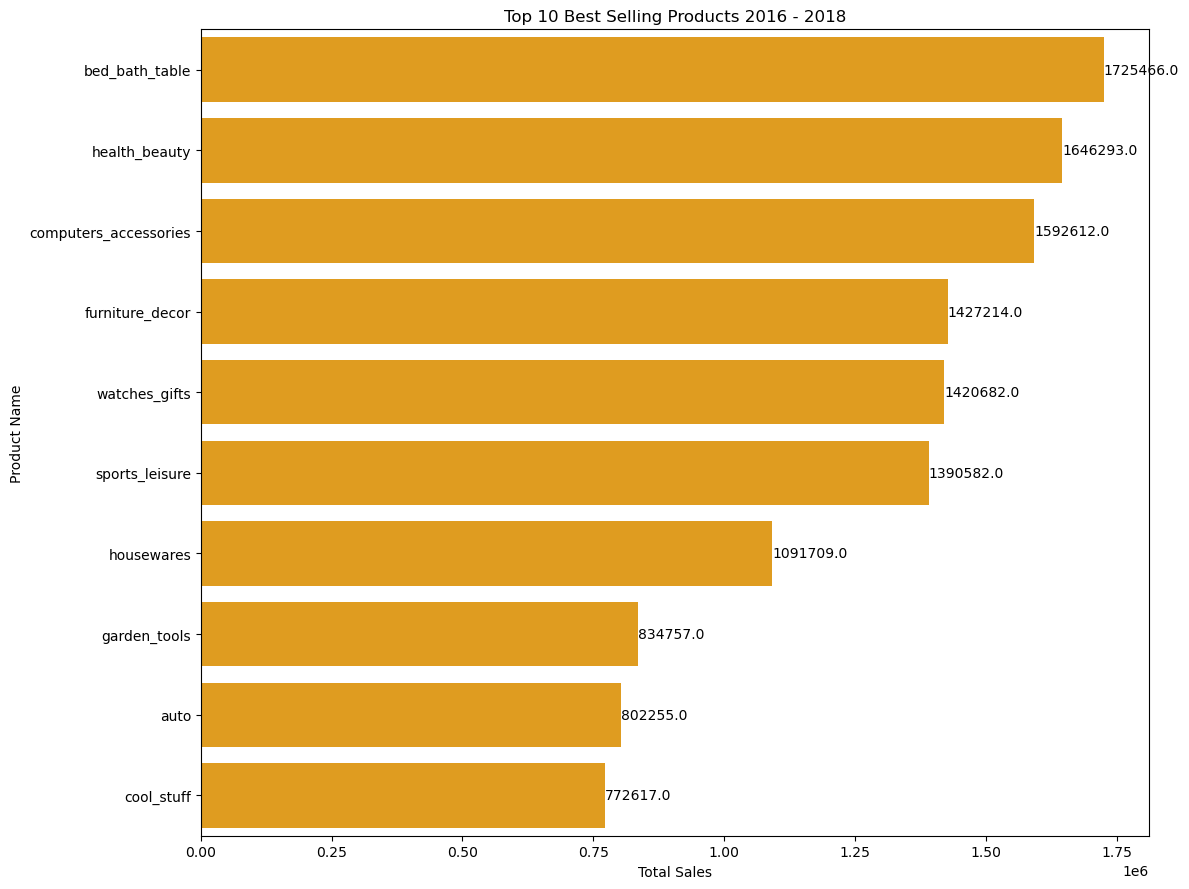

In [134]:
df_product_sales = all_df.groupby(by="product_name").agg({
    "payment_value": "sum",
}).nlargest(10, "payment_value").round().reset_index()

# Mengurutkan DataFrame
df_product_sales = df_product_sales.sort_values(by="payment_value", ascending=False)

# Membuat plot dengan Seaborn
plt.figure(figsize=(12, 9))
sns.barplot(x='payment_value', y='product_name', data=df_product_sales, color='orange')
plt.title('Top 10 Best Selling Products 2016 - 2018')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')

# Menambahkan label angka di samping batang
for i, v in enumerate(df_product_sales['payment_value']):
    plt.text(v+5, i, str(v), fontsize=10, va='center')

plt.tight_layout()
plt.show()

- 10 produk yang memiliki banyak peminat yaitu bed bath table, health beauty, computers accesories, furniture decor, watches gifts, sports leisure, housewares, garden tools, auto, dan cool stuff.

- Produk dengan penjualan tertinggi adalah bed bath table dengan jumlah penjualan 1725466 barang.

### Apa saja 10 produk yang memiliki tingkat penjualan rendah?

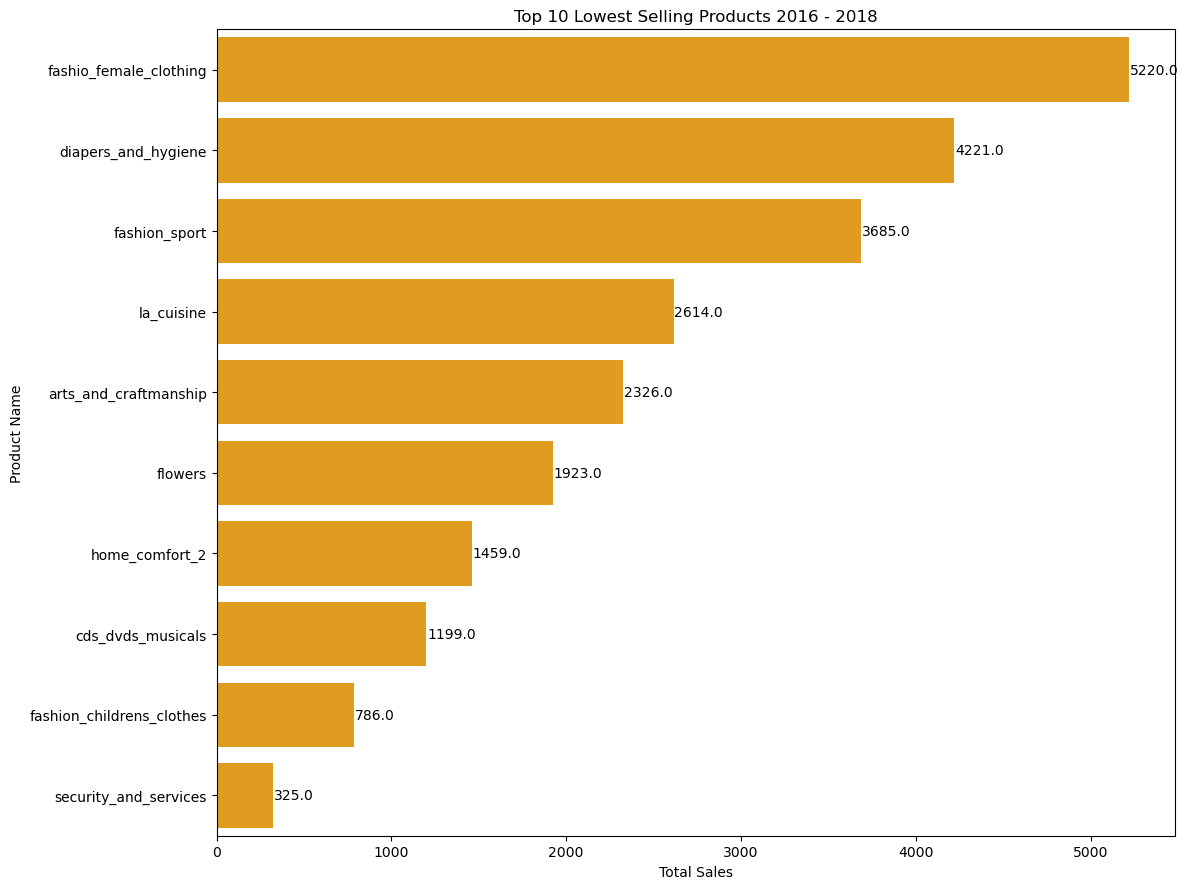

In [135]:
df_product_sales = all_df.groupby(by="product_name").agg({
    "payment_value": "sum",
}).nsmallest(10, "payment_value").round().reset_index()

# Mengurutkan DataFrame
df_product_sales = df_product_sales.sort_values(by="payment_value", ascending=False)

# Membuat plot dengan Seaborn
plt.figure(figsize=(12, 9))
sns.barplot(x='payment_value', y='product_name', data=df_product_sales, color='orange')
plt.title('Top 10 Lowest Selling Products 2016 - 2018')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')

# Menambahkan label angka di samping batang
for i, v in enumerate(df_product_sales['payment_value']):
    plt.text(v+5, i, str(v), fontsize=10, va='center')

plt.tight_layout()
plt.show()

- 10 produk yang memiliki sedikit peminat yaitu security and service, fashion childrens clothes, cds dvds musicals, home comfort, flowers, art and craftmanship, la cuisine, fashion sport, diapers and hygiene, fashion female clothing.

- Produk dengan penjualan terendah adalah security and service dengan jumlah penjualan 325 barang.

### Bagaimana pesebaran wilayah dari customer yang melakukan transaksi? 

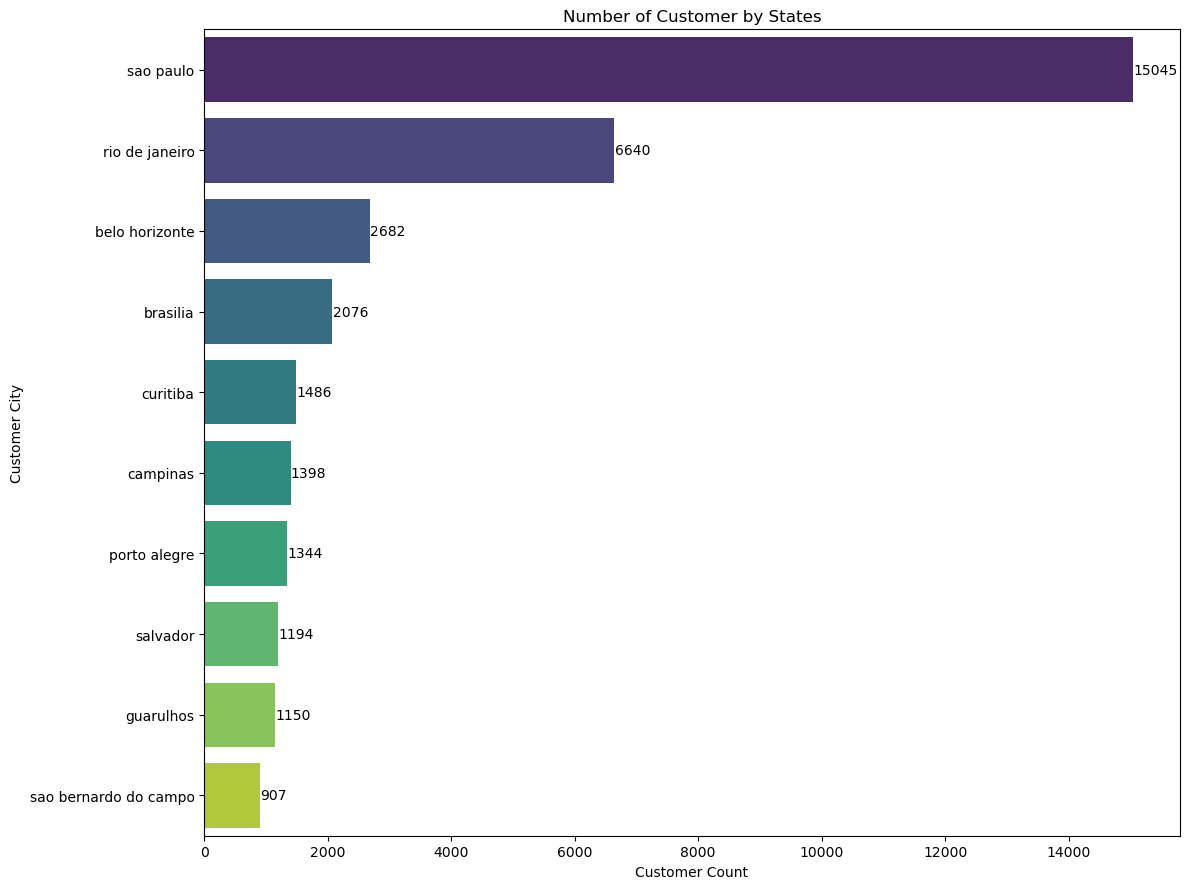

In [136]:
bystate_df = all_df.groupby(by="customer_city").agg({
    "order_id": "nunique",
    "payment_value": "sum",
    "product_name": pd.Series.mode
}).nlargest(10, "order_id").reset_index()
bystate_df.rename(columns={
    "order_id": "customer_count"
}, inplace=True)

# Mengurutkan DataFrame
bystate_df = bystate_df.sort_values(by="customer_count", ascending=False)

# Membuat plot dengan Seaborn
plt.figure(figsize=(12, 9))
sns.barplot(x='customer_count', y='customer_city', data=bystate_df, palette='viridis')
plt.title('Number of Customer by States')
plt.xlabel('Customer Count')
plt.ylabel('Customer City')

# Menambahkan label angka di samping batang
for i, v in enumerate(bystate_df['customer_count']):
    plt.text(v+5, i, str(v), fontsize=10, va='center')

plt.tight_layout()
plt.show()


- Sao Bernando do Campo memiliki pelanggan terendah dari 10 wilayah, dengan jumlah 907 jiwa

- Sao Paulo memiliki pelanggan tertinggi dari 10 wilayah, dengan jumlah 15045 jiwa

### Bagaimana pesebaran wilayah dari seller yang melakukan transaksi ? 

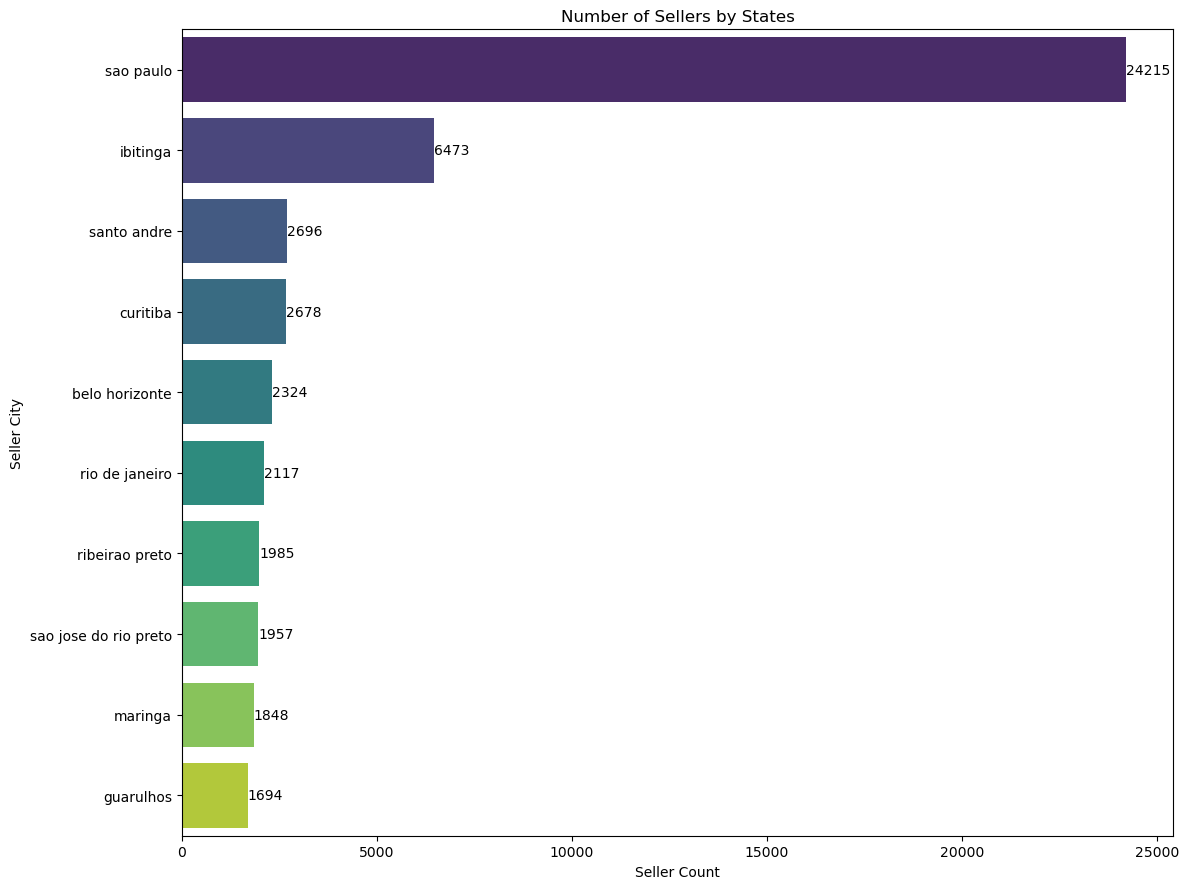

In [138]:
bystate_df = all_df.groupby(by="seller_city").agg({
    "order_id": "nunique",
    "payment_value": "sum",
    "product_name": pd.Series.mode
}).nlargest(10, "order_id").reset_index()
bystate_df.rename(columns={
    "order_id": "seller_count"
}, inplace=True)

# Mengurutkan DataFrame
bystate_df = bystate_df.sort_values(by="seller_count", ascending=False)

# Membuat plot dengan Seaborn
plt.figure(figsize=(12, 9))
sns.barplot(x='seller_count', y='seller_city', data=bystate_df, palette='viridis')
plt.title('Number of Sellers by States')
plt.xlabel('Seller Count')
plt.ylabel('Seller City')

# Menambahkan label angka di samping batang
for i, v in enumerate(bystate_df['seller_count']):
    plt.text(v+5, i, str(v), fontsize=10, va='center')

plt.tight_layout()
plt.show()


- Guarulhos memiliki penjual terendah dari 10 wilayah, dengan jumlah 1694 penjual

- Sao Paulo memiliki penjual tertinggi dari 10 wilayah, dengan jumlah 24215 penjual

### Berapa banyak pesanan yang sampai On Time dan delayed kepada customer?

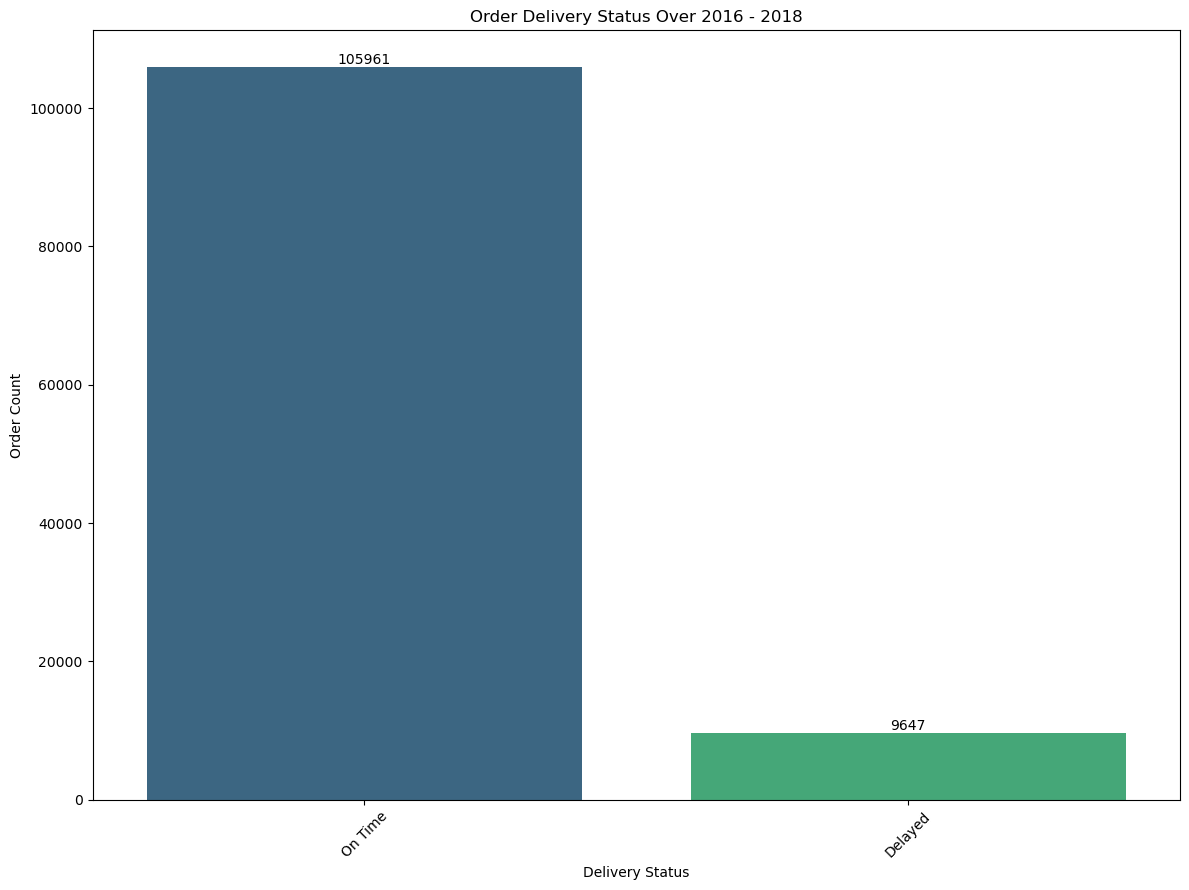

In [141]:
df_product_sales = all_df.groupby(by="delivery_status").agg({
    "order_id": "count"
}).sort_values(by="order_id",ascending=False).reset_index()

# Mengurutkan DataFrame
df_product_sales = df_product_sales.sort_values(by="order_id", ascending=False)

# Membuat plot dengan Seaborn
plt.figure(figsize=(12, 9))
sns.barplot(x='delivery_status', y='order_id', data=df_product_sales, palette='viridis')
plt.title('Order Delivery Status Over 2016 - 2018')
plt.xlabel('Delivery Status')
plt.ylabel('Order Count')

# Menambahkan label angka di atas batang
for i, v in enumerate(df_product_sales['order_id']):
    plt.text(i, v+5, str(v), fontsize=10, ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Hampir sebagian besar produk yaitu sejumlah 105961 produk yang terjual berhasil sampai ke pelanggan dengan tepat waktu.

- Masih ada sebesar 9647 barang yang masih terlambat untuk sampai ke pelanggan.

### Apa jenis pembayaran yang paling banyak digunakan oleh customer? 

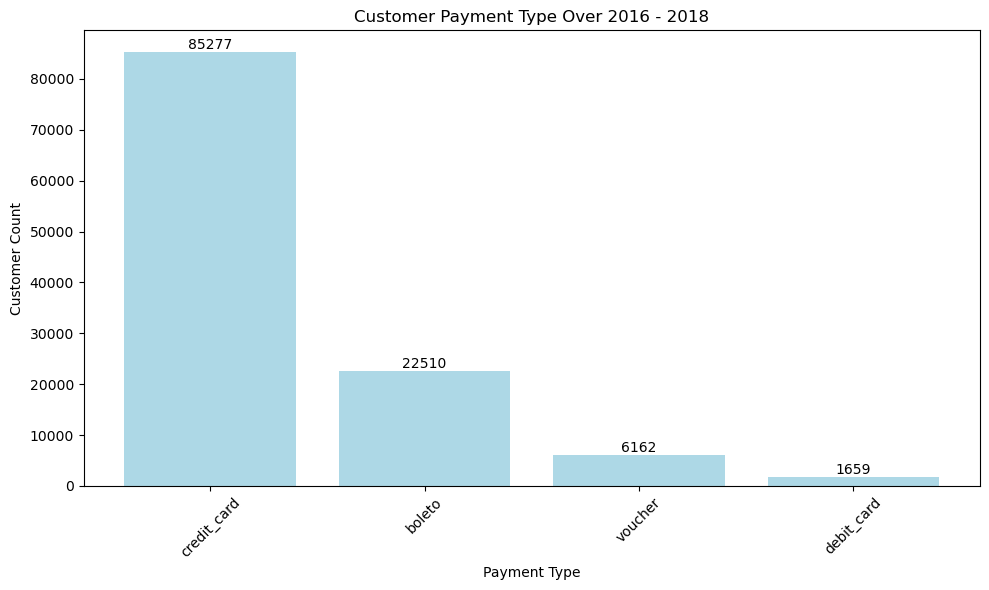

In [142]:
df_payment_type = all_df.groupby(by="payment_type").agg({
    "customer_id": "count",
}).reset_index()

# Mengurutkan DataFrame
df_payment_type = df_payment_type.sort_values(by="customer_id", ascending=False)

# Membuat plot dengan Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df_payment_type['payment_type'], df_payment_type['customer_id'], color='lightblue')
plt.title('Customer Payment Type Over 2016 - 2018')
plt.xlabel('Payment Type')
plt.ylabel('Customer Count')

# Menambahkan label angka di atas batang
for i, v in enumerate(df_payment_type['customer_id']):
    plt.text(i, v+5, str(v), fontsize=10, ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Jenis pembayaran yang paling banyak digunakan pelanggan adalah credit card  dengan jumlah transaksi sebanyak 85277

- Jenis pembayaran yang paling sedikit digunakan pelanggan adalah debit card   yaitu sebesar 1659 

### Kapan waktu yang paling banyak terjadi transaksi oleh customer? 

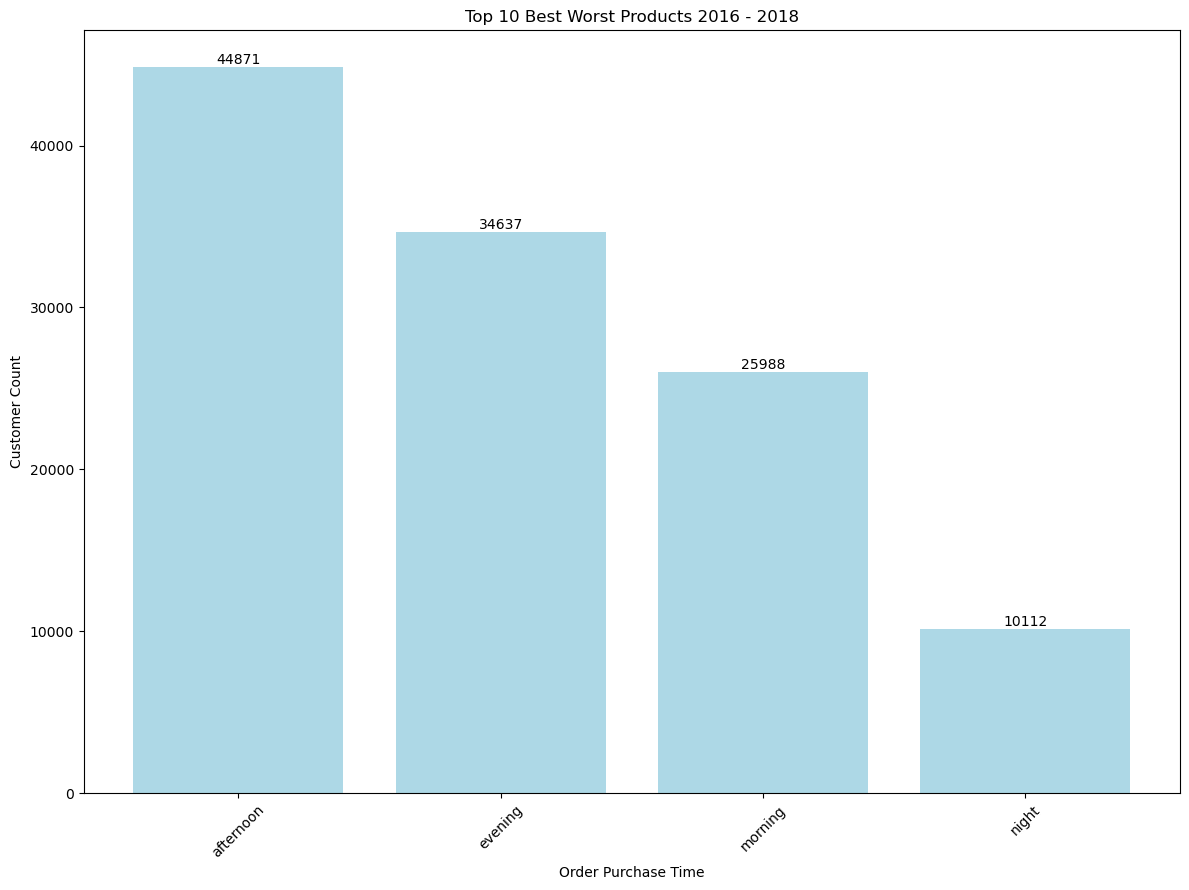

In [143]:
df_product_sales = all_df.groupby(by="order_purchase_time").agg({
    "customer_id": "count"
}).sort_values(by="customer_id",ascending=False).reset_index()

# Mengurutkan DataFrame
df_product_sales = df_product_sales.sort_values(by="customer_id", ascending=False)

# Membuat plot dengan Matplotlib
plt.figure(figsize=(12, 9))
plt.bar(df_product_sales['order_purchase_time'], df_product_sales['customer_id'], color='lightblue')
plt.title('Top 10 Best Worst Products 2016 - 2018')
plt.xlabel('Order Purchase Time')
plt.ylabel('Customer Count')

# Menambahkan label angka di atas batang
for i, v in enumerate(df_product_sales['customer_id']):
    plt.text(i, v+5, str(v), fontsize=10, ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Waktu transaksi pelanggan paling banyak dilakukan pada siang hari yaitu sebesar 44871 transaksi.

- Waktu transaksi pelanggan paling sedikit adalah pada malam hari yaitu hanya sebesar 10112 transaksi.

In [147]:
all_df.to_csv("dashboard/all_data.csv", index=False)

### RFM Analysis 

In [148]:
all_df = pd.read_csv("dashboard/all_data.csv")

In [150]:
datetime_columns = ["order_approved_at","order_delivered_carrier_date",'order_delivered_customer_date','order_estimated_delivery_date' ]
 
for column in datetime_columns:
    all_df[column] = pd.to_datetime(all_df[column])
    all_df[column] = all_df[column].dt.date
    all_df[column] = pd.to_datetime(all_df[column])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115608 entries, 0 to 115607
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115608 non-null  object        
 1   customer_id                    115608 non-null  object        
 2   order_status                   115608 non-null  object        
 3   order_purchase_timestamp       115608 non-null  int64         
 4   order_approved_at              115608 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115608 non-null  datetime64[ns]
 6   order_delivered_customer_date  115608 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115608 non-null  datetime64[ns]
 8   delivery_status                115608 non-null  object        
 9   order_item_id                  115608 non-null  int64         
 10  product_id                     115608 non-null  object        
 11  

In [151]:
df_recency = all_df.groupby(by='customer_id',as_index=False)['order_approved_at'].max()
df_recency.columns = ['CustomerId', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerId,LastPurchaseDate,Recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,293
1,000161a058600d5901f007fab4c27140,2017-07-16,414
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,552
3,0002414f95344307404f0ace7a26f1d5,2017-08-17,382
4,000379cdec625522490c315e70c7a9fb,2018-04-04,152


In [152]:
frequency_df = all_df.drop_duplicates().groupby(
    by=['customer_id'], as_index=False)['order_approved_at'].count()
frequency_df.columns = ['CustomerId', 'Frequency']
frequency_df.head()

,CustomerId,Frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


In [153]:
monetary_df = all_df.groupby(by='customer_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['CustomerId', 'Monetary']
monetary_df.head()

,CustomerId,Monetary
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


In [154]:
rf_df = df_recency.merge(frequency_df, on='CustomerId')
rfm_df = rf_df.merge(monetary_df, on='CustomerId').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerId,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,293,1,114.74
1,000161a058600d5901f007fab4c27140,414,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,552,1,195.42
3,0002414f95344307404f0ace7a26f1d5,382,1,179.35
4,000379cdec625522490c315e70c7a9fb,152,1,107.01


In [155]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()

,CustomerId,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,293,1,114.74,34.145697,43.478734,43.478734
1,000161a058600d5901f007fab4c27140,414,1,67.41,16.669516,43.478734,43.478734
2,0001fd6190edaaf884bcaf3d49edf079,552,1,195.42,2.768150,43.478734,43.478734
3,0002414f95344307404f0ace7a26f1d5,382,1,179.35,21.142179,43.478734,43.478734
4,000379cdec625522490c315e70c7a9fb,152,1,107.01,67.306507,43.478734,43.478734


In [156]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerId', 'RFM_Score']].head(7)

,CustomerId,RFM_Score
0,00012a2ce6f8dcda20d059ce98491703,2.10
1,000161a058600d5901f007fab4c27140,1.97
2,0001fd6190edaaf884bcaf3d49edf079,1.87
3,0002414f95344307404f0ace7a26f1d5,2.01
4,000379cdec625522490c315e70c7a9fb,2.35
5,0004164d20a9e969af783496f3408652,1.90
6,000419c5494106c306a97b5635748086,2.30


In [157]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerId', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerId,RFM_Score,Customer_segment
0,00012a2ce6f8dcda20d059ce98491703,2.10,Low Value Customers
1,000161a058600d5901f007fab4c27140,1.97,Low Value Customers
2,0001fd6190edaaf884bcaf3d49edf079,1.87,Low Value Customers
3,0002414f95344307404f0ace7a26f1d5,2.01,Low Value Customers
4,000379cdec625522490c315e70c7a9fb,2.35,Low Value Customers
5,0004164d20a9e969af783496f3408652,1.90,Low Value Customers
6,000419c5494106c306a97b5635748086,2.30,Low Value Customers
7,00046a560d407e99b969756e0b10f282,2.17,Low Value Customers
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.04,Low Value Customers
9,000598caf2ef4117407665ac33275130,2.57,Low Value Customers


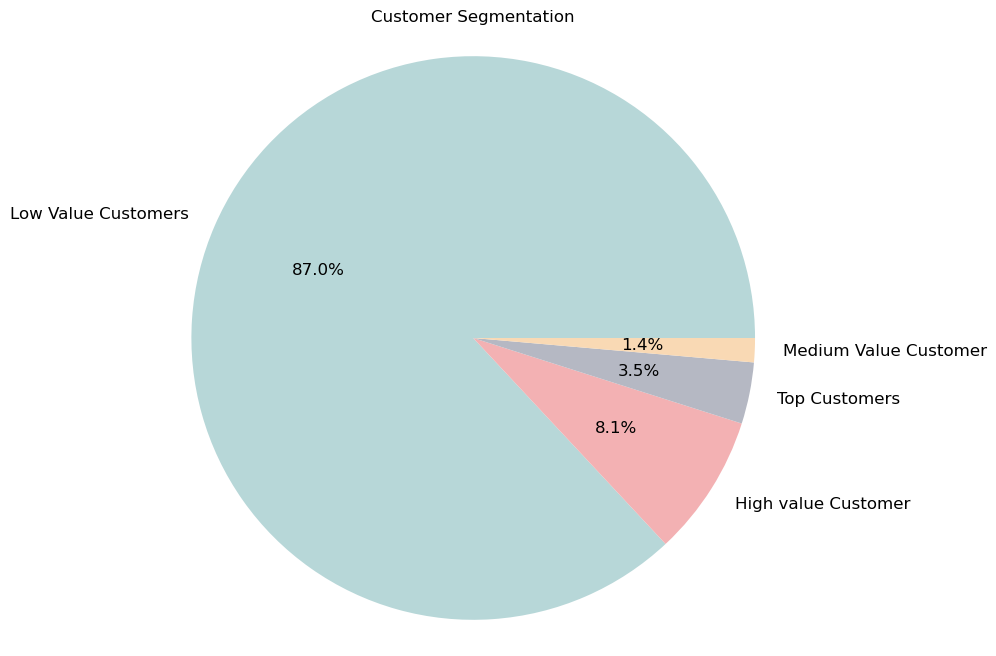

In [158]:
# Count the occurrences of each segment
segment_counts = rfm_df['Customer_segment'].value_counts()
# Define a pastel color palette
color_palette = ['#B7D7D8', '#F3B1B3', '#B5B8C3', '#F9D9B4']

# Create a Pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', colors=color_palette, textprops={'fontsize': 12})
plt.title('Customer Segmentation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

- Banyak dari pelanggan merupakan pelanggan dengan indeks 'Low Value Customer,' menunjukkan bahwa mereka memiliki skor RFM di bawah 1.6, yang merupakan nilai yang sangat rendah. Hal ini disebabkan oleh sejumlah besar pelanggan yang hanya melakukan satu transaksi dan tidak melakukan transaksi lagi selama periode 2016 hingga 2018.

- Hanya 3.52% dari keseluruhan pelanggan yang termasuk kedalam 'Top customer' dan hanya sebesar 8.14% yang termasuk kedalam 'High Value Customer'.